## PROJECT : Predicting Trade Union Status of Data Scientists
### Kuheli Sen

### Project Goal : The goal of this project is to analyze the training data and predict the Trade Union Status of the Data Scientists. The target variable is "LeftUnion" which describes the status of each member (still a union member (LeftUnion_No); or no longer a member (LeftUnion_Yes)).

### Objectives:

#### Load the dataset and preprocess the data for missing values and outliers.

#### Perform an early data analysis (charts and graphs), standardize numeric data and binary encode the categorical data.

#### Perform PCA to find the correlated features.

#### Prepare different types of data models and compare the models and accuracies.

#### Discuss the results and provide conclusions.

In [1]:
# I imported all the packages required for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from graphviz import Digraph
import os 

### I loaded the training data and preprocessed it as follows:

In [2]:
# loaded the data:
train_data = pd.read_csv('Kuheli -TRAIN.csv', sep=',')

# removed ID before you perform PCA.
train_data = train_data.drop(['ID'],axis=1)
train_data.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Female,0,Yes,Yes,62,No,Maryville,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),49,3009,No
1,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,70,Yes
2,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116,8014,No
3,Female,0,No,No,1,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Electronic check,21,21,No
4,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98,713,Yes


In [3]:
# I checked any missing values in the Data Frame as follows:
train_data.isnull().values.any()

False

### Now I want to look for outliers in my dataset:

In [4]:
# I created a new column for log values of MonthlyDues for visualizing the box plot properly:
train_data.loc[:, 'Log_MonthlyDues'] = np.log(train_data.MonthlyDues)

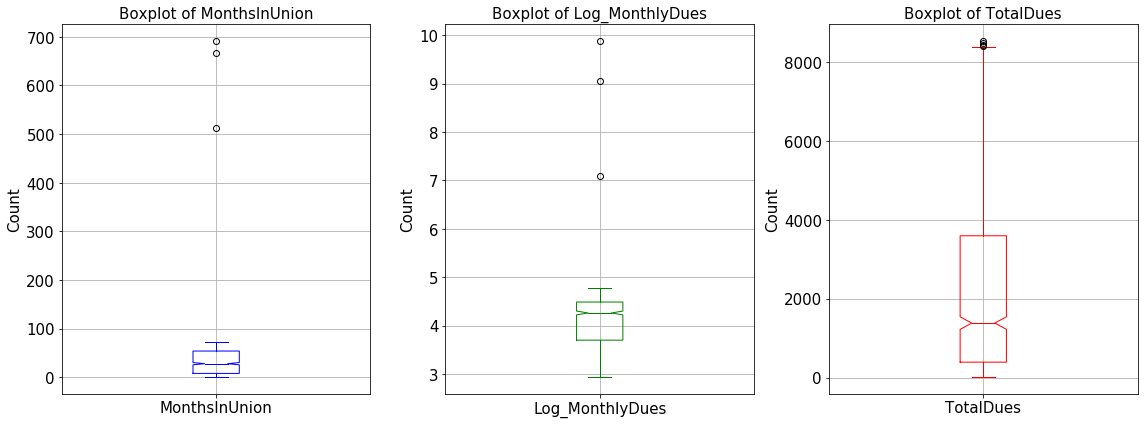

In [5]:
# Now I want to see if there are any outliers in the numeric features:
# I created box plots for all of the numeric features:
plt.figure(figsize=[16,6])
plt.subplot(1, 3, 1)
train_data.boxplot(column=['MonthsInUnion'], fontsize=15, notch = True, color='blue')
plt.title('Boxplot of MonthsInUnion',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.subplot(1, 3, 2)
train_data.boxplot(column=['Log_MonthlyDues'], fontsize=15, notch = True, color='green')
plt.title('Boxplot of Log_MonthlyDues',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.subplot(1, 3, 3)
train_data.boxplot(column=['TotalDues'], fontsize=15, notch = True, color='red')
plt.title('Boxplot of TotalDues',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.tight_layout()
plt.show()

### There are three outliers in my dataset as shown by the box plots. I identified those rows and removed them from my dataset below:

In [6]:
train_data[train_data.MonthsInUnion > 100] # I identified the rows with outliers.

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,...,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion,Log_MonthlyDues
65,Male,1,Yes,No,691,Yes,No,Fiber optic,No,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),8622,2874,No,9.062072
497,Female,0,No,No,513,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1209,403,Yes,7.097549
675,Female,1,Yes,No,666,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,19437,6479,No,9.874934


In [7]:
train_data[train_data.Log_MonthlyDues > 5]      # I identified the rows with outliers

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,...,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion,Log_MonthlyDues
65,Male,1,Yes,No,691,Yes,No,Fiber optic,No,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),8622,2874,No,9.062072
497,Female,0,No,No,513,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1209,403,Yes,7.097549
675,Female,1,Yes,No,666,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,19437,6479,No,9.874934


In [8]:
# Now I removed the extra Log_MonthlyDues column from my dataset as I donot need this column anymore:
del train_data['Log_MonthlyDues']
train_data.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Female,0,Yes,Yes,62,No,Maryville,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),49,3009,No
1,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,70,Yes
2,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116,8014,No
3,Female,0,No,No,1,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Electronic check,21,21,No
4,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98,713,Yes


### I removed the outliers as follows:

In [9]:
train_data1 = train_data.drop(train_data.index[[65, 497, 675]])
print(f'Number of rows before removing outliers:     {len(train_data.index)} \nNumber of rows after removing outlier rows:  {len(train_data1.index)}')

Number of rows before removing outliers:     999 
Number of rows after removing outlier rows:  996


In [10]:
# I exported the cleaned data as a csv:
train_data1.to_csv(r'Train_data_clean.csv')

### Now I created pair plots to see the relationships between numeric features and their relationship to the target label. 

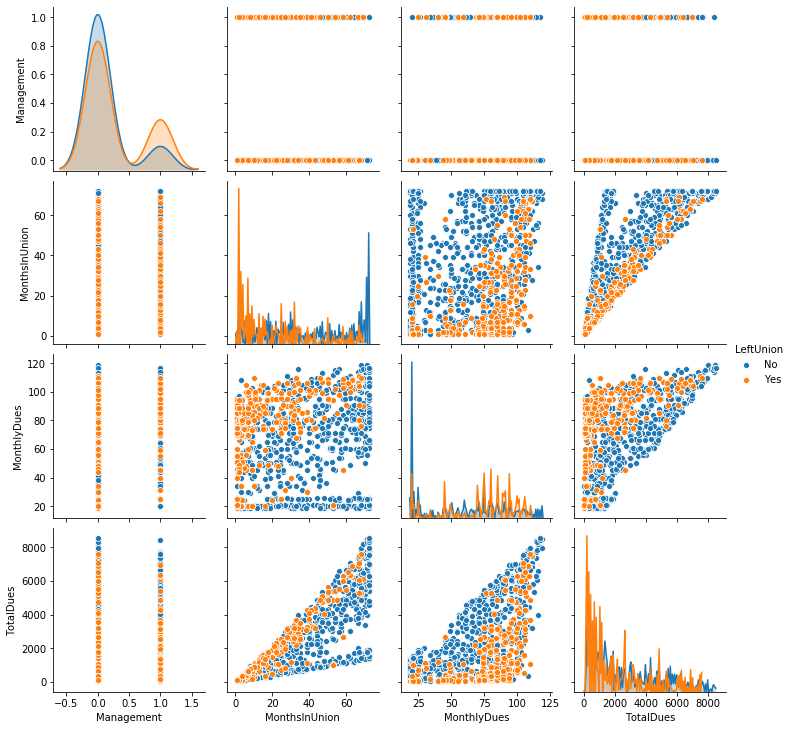

In [11]:
# ploted the data using seaborn
sns.pairplot(train_data1, 
             hue = "LeftUnion",diag_kws={'bw': 0.2}, dropna = True) # helps to separate the values by Label
            

### I created two violin plots: 
#### Plot1. MonthlyDues against Management     
#### Plot2. MonthlyDues against gender
#### Both plots showed that most of the individuals having higher MonthlyDues had LeftUnion.

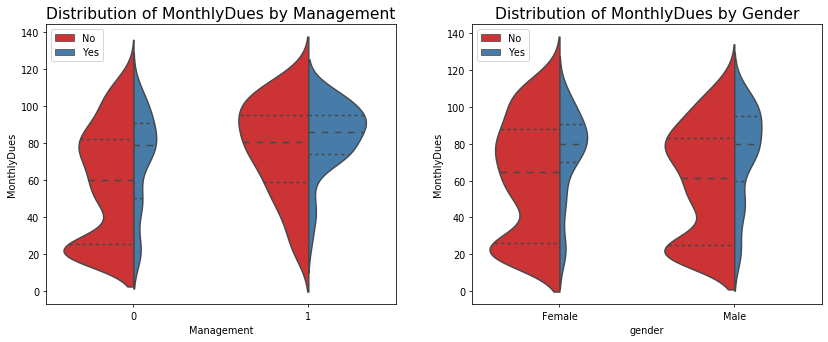

In [12]:
# instanciate the figure
plt.figure(figsize = (12, 5), dpi= 70)

# I created two subplots:
plt.subplot(1, 2, 1)
# ploted the data using seaborn
ax = sns.violinplot(x ="Management", y="MonthlyDues",hue="LeftUnion", data=train_data1,palette="Set1",split = True, scale="count", inner="quartile")
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set a title and change the legend location
ax.set_title('Distribution of MonthlyDues by Management', fontsize = 16)
ax.legend(loc = "upper left", fontsize = 10);

plt.subplot(1, 2, 2)
# plot the data using seaborn
ax = sns.violinplot(x ="gender", y="MonthlyDues",hue="LeftUnion", data=train_data1,palette="Set1",split = True, scale="count", inner="quartile")
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set a title and change the legend location
ax.set_title('Distribution of MonthlyDues by Gender', fontsize = 16)
ax.legend(loc = "upper left", fontsize = 10);
plt.tight_layout()
plt.show()

### Now I looked into the relationship between features: FeatureA - FeatureG which are not explained well. I prepared stacked bar charts for all these features to see its distribution for the Target variable (LeftUnion)

In [13]:
# Data preparation for preparing the stacked bar charts:
LU_by_fA = pd.crosstab(train_data1.FeatureA, train_data1.LeftUnion)
LU_by_fB = pd.crosstab(train_data1.FeatureB, train_data1.LeftUnion)
LU_by_fC = pd.crosstab(train_data1.FeatureC, train_data1.LeftUnion)
LU_by_fD = pd.crosstab(train_data1.FeatureD, train_data1.LeftUnion)
LU_by_fE = pd.crosstab(train_data1.FeatureE, train_data1.LeftUnion)
LU_by_fF = pd.crosstab(train_data1.FeatureF, train_data1.LeftUnion)
LU_by_fG = pd.crosstab(train_data1.FeatureG, train_data1.LeftUnion)

In [14]:
# Data preparation for preparing the stacked bar charts:
LU_by_fA_props = LU_by_fA / LU_by_fA.sum(axis = 0)
bb1=np.cumsum(LU_by_fA_props)-LU_by_fA_props
LU_by_fB_props = LU_by_fB / LU_by_fB.sum(axis = 0)
bb2=np.cumsum(LU_by_fB_props)-LU_by_fB_props
LU_by_fC_props = LU_by_fC / LU_by_fC.sum(axis = 0)
bb3=np.cumsum(LU_by_fC_props)-LU_by_fC_props
LU_by_fD_props = LU_by_fD / LU_by_fD.sum(axis = 0)
bb4=np.cumsum(LU_by_fD_props)-LU_by_fD_props
LU_by_fE_props = LU_by_fE / LU_by_fE.sum(axis = 0)
bb5=np.cumsum(LU_by_fE_props)-LU_by_fE_props
LU_by_fF_props = LU_by_fF / LU_by_fF.sum(axis = 0)
bb6=np.cumsum(LU_by_fF_props)-LU_by_fF_props
LU_by_fG_props = LU_by_fG / LU_by_fG.sum(axis = 0)
bb7=np.cumsum(LU_by_fG_props)-LU_by_fG_props

# I prepared a Data Frame to see the frequency of all three categories (FeatureA - FeatureG):
List = list(LU_by_fA.sum(axis=1))+list(LU_by_fB.sum(axis=1))+list(LU_by_fC.sum(axis=1))+list(LU_by_fD.sum(axis=1))+list(LU_by_fE.sum(axis=1))+list(LU_by_fF.sum(axis=1))+list(LU_by_fG.sum(axis=1))
L = np.array(List).reshape(7,3)
C = ['Maryville','NO','Yes']
F = ['FeatureA','FeatureB','FeatureC','FeatureD','FeatureE','FeatureF','FeatureG']
df = pd.DataFrame(L, columns = C, index = F)
print("FeatureB - FeatureG all have the same counts for 'Maryville'")
df

FeatureB - FeatureG all have the same counts for 'Maryville'


,Maryville,NO,Yes
FeatureA,94,493,409
FeatureB,208,405,383
FeatureC,208,489,299
FeatureD,208,449,339
FeatureE,208,440,348
FeatureF,208,516,272
FeatureG,208,391,397


In [15]:
# I created this function for preparing the stacked bar charts:
def distFeature(plt, plotLoc, propTable, barBottom, heading):
    plt.subplot(3, 3, plotLoc)
    for i, r in enumerate(propTable.index):
        plt.bar(propTable.columns, propTable.iloc[i, :], label=r, color=palette[i], bottom=barBottom.iloc[i,:], edgecolor='black')    
    plt.title(heading)
    plt.xlabel('LeftUnion')
    plt.ylabel('Proportion')
    plt.legend(bbox_to_anchor= (1,1.01))
    return

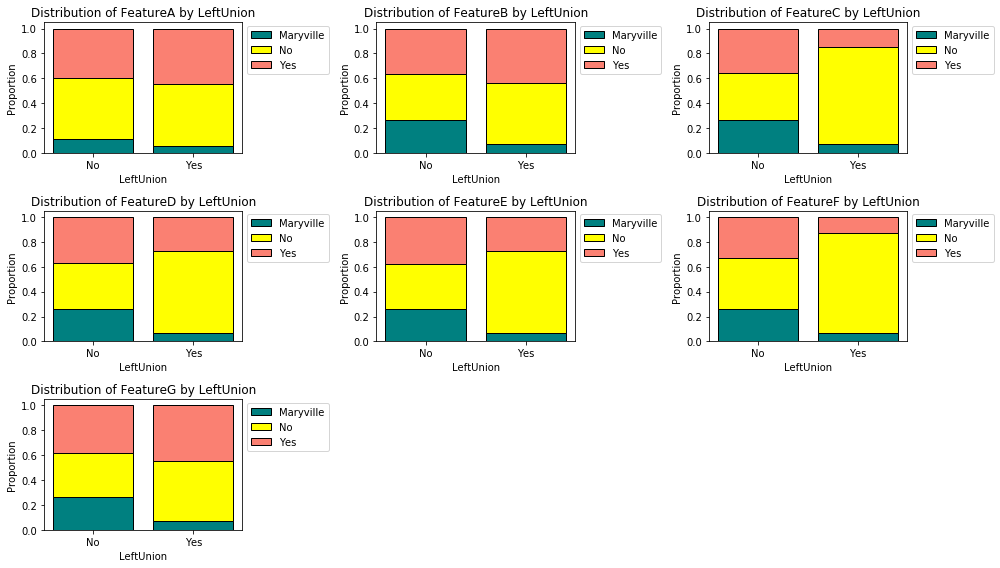

These plots showed that they have similar distribution for "Maryville" in FeatureB - FeatureG


In [16]:
# I created these stacked bar charts:
palette = ['Teal', 'Yellow', 'Salmon']
plt.figure(figsize=([14,8]))

distFeature(plt, 1, LU_by_fA_props, bb1, 'Distribution of FeatureA by LeftUnion')
distFeature(plt, 2, LU_by_fB_props, bb2, 'Distribution of FeatureB by LeftUnion')
distFeature(plt, 3, LU_by_fC_props, bb3, 'Distribution of FeatureC by LeftUnion')
distFeature(plt, 4, LU_by_fD_props, bb4, 'Distribution of FeatureD by LeftUnion')
distFeature(plt, 5, LU_by_fE_props, bb5, 'Distribution of FeatureE by LeftUnion')
distFeature(plt, 6, LU_by_fF_props, bb6, 'Distribution of FeatureF by LeftUnion')
distFeature(plt, 7, LU_by_fG_props, bb7, 'Distribution of FeatureG by LeftUnion')

plt.tight_layout()
plt.show()
print('These plots showed that they have similar distribution for "Maryville" in FeatureB - FeatureG')

### Now I prepared the data for PCA and Data Analysis:

In [17]:
# I have split the data into numeric, categorical and target variables:
train_num = train_data1[['MonthsInUnion','MonthlyDues','TotalDues']]
train_cat = train_data1[['Management','gender', 'USAcitizen', 'Married','ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 
                             'FeatureD','FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency','PaperlessBilling',
                             'PaymentMethod']]
y = train_data1.loc[:,'LeftUnion'].values

print("Numerical Feature  Shape:     "+ str(train_num.shape))
print("Categorical Feature  Shape:   "+ str(train_cat.shape))

Numerical Feature  Shape:     (996, 3)
Categorical Feature  Shape:   (996, 16)


In [18]:
# I displayed the categorical training data:
train_cat.head()

,Management,gender,USAcitizen,Married,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod
0,0,Female,Yes,Yes,No,Maryville,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic)
1,1,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,0,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3,0,Female,No,No,Yes,No,other,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,No,Electronic check
4,0,Male,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [19]:
# I encoded the categories as 0 and 1 as follows:
train_enc = pd.get_dummies(train_cat)
train_enc

,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,ContinuingEd_No,ContinuingEd_Yes,FeatureA_Maryville,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1,1,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
3,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,1,0,1,0,0,1,0,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
995,0,0,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
996,0,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
997,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [20]:
# I displayed the numeric training data:
train_num

,MonthsInUnion,MonthlyDues,TotalDues
0,62,49,3009
1,1,70,70
2,72,116,8014
3,1,21,21
4,7,98,713
...,...,...,...
994,5,44,202
995,50,71,3487
996,62,106,6704
997,1,75,75


### I standardized the numeric features so that they have a mean equals 0 and Standard deviation equals 1:

In [21]:
train_num2 = StandardScaler().fit_transform(train_num)
print("Encoded Feature Array Shape: " + str(train_num2.shape))

#Let's check the mean and standard deviation - we expect this to be close to 0 & 1, respectively.
print(f'                       Mean: {np.mean(train_num2)} \n         Standard deviation: {np.std(train_num2)}')


Encoded Feature Array Shape: (996, 3)
                       Mean: 2.4968871236549705e-17 
         Standard deviation: 1.0


In [22]:
# I prepared a Data Frame of the standardized data:
train_num3 = pd.DataFrame(train_num2, index = train_num.index)
train_num3

,0,1,2
0,1.239976,-0.540438,0.359736
1,-1.251046,0.170538,-0.973551
2,1.648340,1.727913,2.630270
3,-1.251046,-1.488405,-0.995780
4,-1.006027,1.118505,-0.681852
...,...,...,...
994,-1.087700,-0.709718,-0.913669
995,0.749939,0.204394,0.576582
996,1.239976,1.389353,2.035985
997,-1.251046,0.339817,-0.971283


In [23]:
# I defined the column names:
train_num3 = train_num3.rename(columns = {train_num3.columns[0]:'MonthsInUnion',
                                 train_num3.columns[1]:'MonthlyDues',
                                 train_num3.columns[2]:'TotalDues'})


In [24]:
# Printed the shapes:
print(train_enc.shape)
print(train_num3.shape)

(996, 43)
(996, 3)


In [25]:
#Let's combine the numerical and categrical datasets
norm_train_data = pd.concat([train_num3, train_enc], axis = 1)
print("Feature Shape: " + str(norm_train_data.shape))

Feature Shape: (996, 46)


In [26]:
# I displayed the combined Data Frame as follows:
norm_train_data.head()

,MonthsInUnion,MonthlyDues,TotalDues,Management,gender_Female,gender_Male,USAcitizen_No,USAcitizen_Yes,Married_No,Married_Yes,...,FeatureB_Yes,DuesFrequency_Month-to-month,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.239976,-0.540438,0.359736,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1,-1.251046,0.170538,-0.973551,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1.648340,1.727913,2.630270,0,1,0,1,0,1,0,...,1,0,0,1,0,1,1,0,0,0
3,-1.251046,-1.488405,-0.995780,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,-1.006027,1.118505,-0.681852,0,0,1,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0


### I analyzed the correlation between different features and prepared a heat map for visualization:

Correlation matrix: Warm colors(red) indicate a positive correlation, cool colors(blue) indicate a negative correlation between features


Text(0.5, 1, 'Correlation matrix')

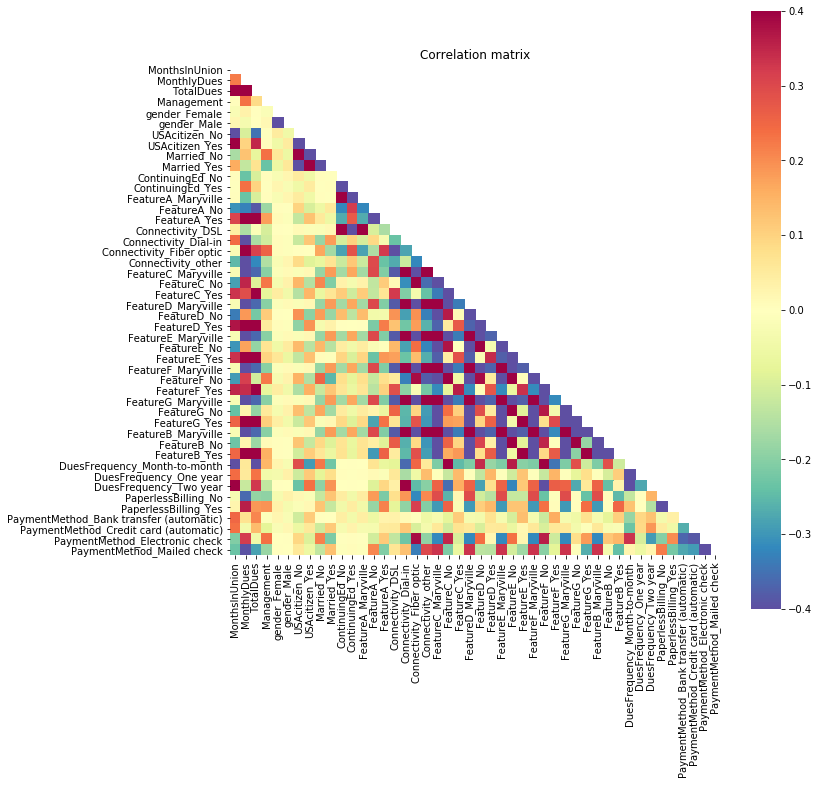

In [27]:
# I prepared a heat map of the features to see the correlation: 
print('Correlation matrix: Warm colors(red) indicate a positive correlation, cool colors(blue) indicate a negative correlation between features')
plt.figure(figsize=([11,11]))
corrs = norm_train_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

### I performed Principal Component Analysis (PCA) to see the correlation between different features and then to select features for Data Modeling:

In [28]:
# I performed PCA as follows:
pca = PCA(n_components=6)
principalComponents_train_data = pca.fit_transform(norm_train_data)

In [29]:
print(principalComponents_train_data.shape)

(996, 6)


In [30]:
# I prepared a Data frame of the Principal Components and displayed it as follows:
principalComponents_train_data_Df = pd.DataFrame(data = principalComponents_train_data
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5','p_c_6'])
principalComponents_train_data_Df.head()

,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5,p_c_6
0,0.714374,1.611364,2.257769,0.209784,0.799500,-0.120362
1,-0.843429,-2.481887,-0.395277,0.149674,0.017203,-0.901739
2,3.730241,1.506113,-0.699937,1.520282,-0.279620,-0.369055
3,-3.205181,0.490302,-1.044194,0.996986,0.213174,-0.193839
4,0.550580,-1.696217,-1.290574,0.221329,-0.206369,1.299599


In [31]:
# I printed the eigenvalues as follows:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28032557 0.19264121 0.07053188 0.04835277 0.04307662 0.0410486 ]


### I prepared a scree plot to display the eigenvalues against the Principal Components

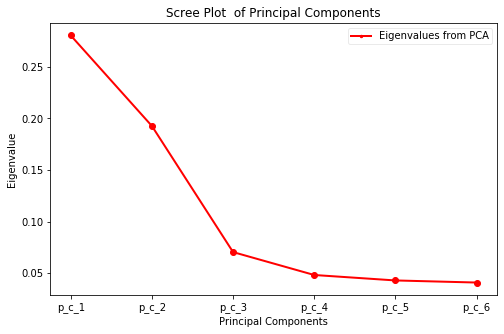

In [32]:
fig = plt.figure(figsize=(8,5))
plt.plot(principalComponents_train_data_Df.columns, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot  of Principal Components')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [33]:
# After looking at the output, I noticed that variables #19, 22, 25, 28, 31, and 34 have 
# identical principal components.
df_comp = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4', 'component 5']))
components = df_comp.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components
components.transpose()

,component 0,component 1,component 2,component 3,component 4,component 5
1,0.489319,-0.228974,-0.253352,-0.024376,0.183033,-0.023693
2,0.488578,0.265748,-0.014914,0.022291,-0.107746,-0.099038
0,0.336554,0.472678,0.140367,-0.023564,-0.307013,-0.161513
33,0.168329,-0.010424,-0.100333,0.116708,0.161689,0.309424
36,0.166240,-0.011328,-0.118477,0.123660,0.090923,0.326789
27,0.150171,0.032935,0.029076,0.180745,0.107851,0.180640
24,0.150093,0.036793,0.043987,-0.011886,0.016949,-0.085459
17,0.145167,-0.142761,-0.286094,-0.129325,0.009824,-0.161092
14,0.140019,0.011812,-0.156309,-0.039595,-0.177680,-0.094761
30,0.114043,0.062809,0.145727,0.110766,0.160628,0.077851


In [34]:
# Removed all but one (kept one of them) from the norm_train_data
# Now, we have to identify and remove correlated variables.
##Exclude: 19, 22, 25, 28, 31, and 34 
# In the next step we will remove all but one
# Identified the correlated features:
norm_train_data.iloc[:, [10, 12, 19, 22, 25, 28, 31,34]].head()

,ContinuingEd_No,FeatureA_Maryville,FeatureC_Maryville,FeatureD_Maryville,FeatureE_Maryville,FeatureF_Maryville,FeatureG_Maryville,FeatureB_Maryville
0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0


In [35]:
#Let's drop the correlated variables

# The dataframe (final) created below is going to be the final predictors.
# our target variable is: y = train_data[['LeftUnion']]

final = norm_train_data.drop(['FeatureA_Maryville','FeatureC_Maryville',
                                      'FeatureD_Maryville',
                                      'FeatureE_Maryville',
                                      'FeatureF_Maryville',
                                      'FeatureG_Maryville'], axis = 1)
X = final.iloc[:,0:].values
print(X.shape)

(996, 40)


In [36]:
# I have split the data into training and test set as follows:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

#### Now I will perform Data Analysis to compare the accuracy of different models as follows:

### MODEL 1: Logistic Regression

In [37]:
# I trained the model for the X_train as follows:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter = 1000, dual = False, C=0.3, multi_class = 'ovr',l1_ratio = None, random_state = 10)
lr.fit(X_train, y_train)
np.set_printoptions(suppress=True)
# I printed the intercept and coefficients:
print('Intercept:   ',  lr.intercept_)
print(f'Coefficients: , \n{lr.coef_}')

Intercept:    [-2.05656361]
Coefficients: , 
[[-0.76364742  0.38780358  0.          0.07432578  0.          0.
   0.          0.          0.00000082 -0.03012324  0.          0.
   0.          0.         -0.42290257  0.          0.39723906  0.
   0.28753725 -0.31216705  0.          0.          0.16025354 -0.00053089
   0.25201099 -0.20883995 -0.00000206  0.13081883  0.          0.
   0.          0.46877776  0.         -0.3950728  -0.00799691  0.0000001
  -0.01664583  0.          0.50801131  0.        ]]


In [38]:
# I printed the accuracy scores for train and test sets:
train_acc_lr = lr.score(X_train, y_train)
test_acc_lr = lr.score(X_test, y_test)
print('Observation: The Test accuracy is more than the Train accuracy')
print('Training Accuracy for Logistic regression:', round(train_acc_lr,4))
print('Testing Accuracy for Logistic Regression:', round(test_acc_lr,4))

Observation: The Test accuracy is more than the Train accuracy
Training Accuracy for Logistic regression: 0.8028
Testing Accuracy for Logistic Regression: 0.825


In [39]:
test_pred_lr = lr.predict(X_test)
C = confusion_matrix(test_pred_lr, y_test)
pd.DataFrame(C, columns = ['No', 'Yes'], index = ['No', 'Yes'])

,No,Yes
No,132,23
Yes,12,33


In [40]:
# I listed few pridictions to compare it to observed labels:
print('Observed Labels: ', y_test[:12].reshape(12,))
print('Predicted Labels:', test_pred_lr[:12])

Observed Labels:  ['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No']
Predicted Labels: ['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No']


### MODEL 2: Decision Tree

In [41]:
# I performed the following to find the optimal value of max_depth to achieve the maximum accuracy:
dt_train_acc = []
dt_test_acc = []
depth_range = range(2,31)
for d in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1, criterion='entropy')
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_test_acc.append(temp_tree.score(X_test, y_test))

dt_idx = np.argmax(dt_test_acc)
dt_opt_depth = depth_range[dt_idx]
dt_opt_train_acc = dt_train_acc[dt_idx]
dt_opt_test_acc = dt_test_acc[dt_idx]
print('Optimal Value of max_depth:           ', dt_opt_depth)  
print('Training Accuracy for Optimal Model:  ', round(dt_opt_train_acc,4))
print('Test Accuracy for Optimal Model:', round(dt_opt_test_acc,4))

Optimal Value of max_depth:            6
Training Accuracy for Optimal Model:   0.8367
Test Accuracy for Optimal Model: 0.805


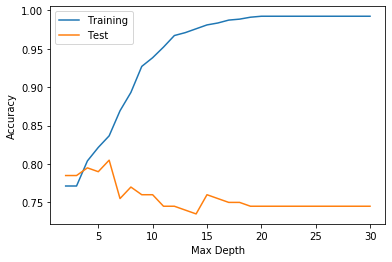

In [42]:
# I ploted the accuracy for different values of max_depth:
plt.figure(figsize=([6,4]))
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_test_acc, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
# I created a tree model and used the optimal value for max_depth as identified in above code cell:
final_tree = DecisionTreeClassifier(max_depth=dt_opt_depth, random_state=1, criterion='entropy')
final_tree = final_tree.fit(X_train, y_train)
print('Training Accuracy for Final tree Model:  ', round(final_tree.score(X_train, y_train),4))
print('Test Accuracy for Final tree Model:', round(final_tree.score(X_test, y_test),4))
    

Training Accuracy for Final tree Model:   0.8367
Test Accuracy for Final tree Model: 0.805


In [44]:
# I prepared a confusion matrix of the predicted values:
predictions = final_tree.predict(X_test)
C = confusion_matrix(predictions, y_test)
pd.DataFrame(C, columns = ['No', 'Yes'], index = ['No', 'Yes'])

,No,Yes
No,130,25
Yes,14,31


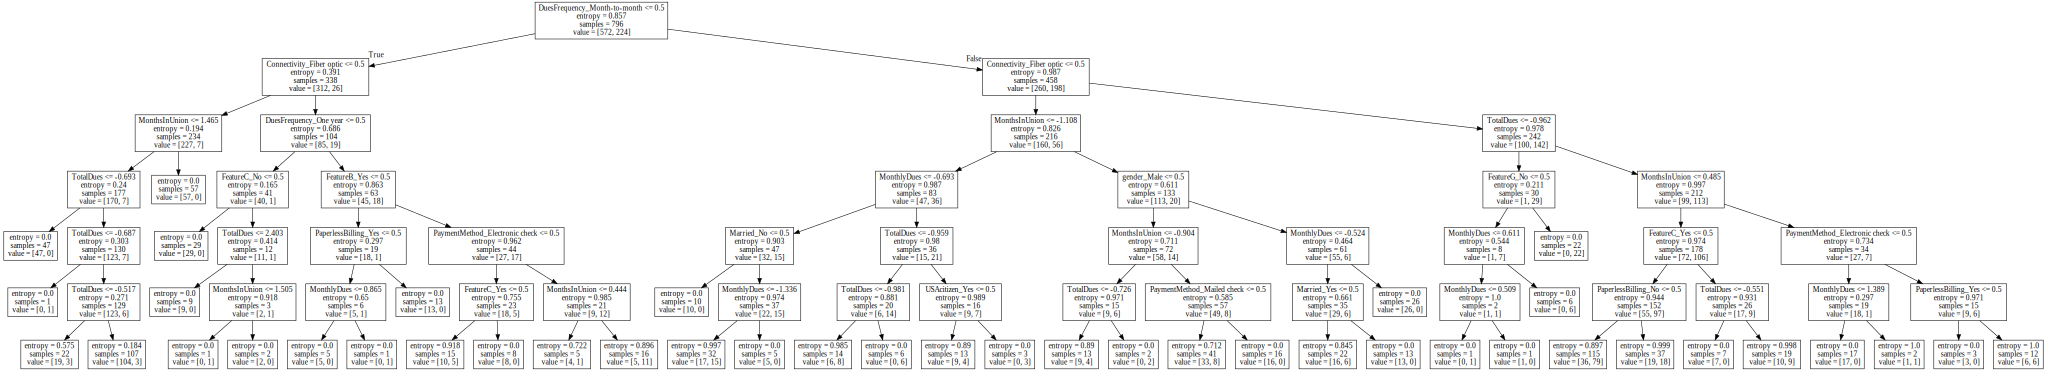

In [45]:
# I plotted the decision tree as follows:
features = list( final.columns)
folder = os.getcwd()
picName = '/values-entropy'
with open(folder + picName + '.dot','w') as f_entropy:  # This creates a .dot file of the entropy at various split points.
    f_entropy = tree.export_graphviz(final_tree, feature_names = features, out_file=f_entropy)
with open(folder + picName + '.dot') as f_entropy:
    dot_graph_entropy = f_entropy.read()
    entropy = graphviz.Source(dot_graph_entropy)
entropy  

### MODEL 3: Random Forest

In [46]:
# I performed the following to find the optimal value of max_depth to achieve the maximum accuracy:
np.random.seed(1)
rf_train_acc = [] 
rf_test_acc = []
depth_range = range(2,31)
for d in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=1000, max_depth=d, random_state=1 )
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_test_acc.append(temp_forest.score(X_test, y_test))
    
rf_idx = np.argmax(rf_test_acc)
rf_opt_depth = depth_range[rf_idx]
rf_opt_train_acc = rf_train_acc[rf_idx]
rf_opt_test_acc = rf_test_acc[rf_idx]
print('Optimal Value of max_depth:           ', rf_opt_depth)  
print('Training Accuracy for Optimal Model:  ', round(rf_opt_train_acc,4))
print('Test Accuracy for Optimal Model:', round(rf_opt_test_acc,4))

Optimal Value of max_depth:            6
Training Accuracy for Optimal Model:   0.8668
Test Accuracy for Optimal Model: 0.85


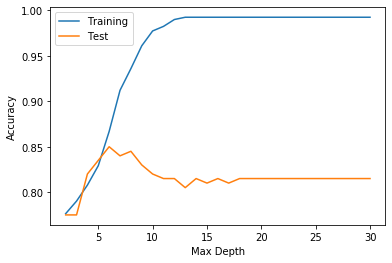

In [47]:
# I ploted the accuracy for different values of max_depth:
plt.figure(figsize=([6,4]))
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_test_acc, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
# I created a Random Forest model and used the optimal value for max_depth as identified in above code cell:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=1000, max_depth=rf_opt_depth, random_state=1)
final_model.fit(X_train, y_train)
print('Training Accuracy for Random Forest Model:  ', round(final_model.score(X_train, y_train),4))
print('Test Accuracy for Random Forest Model:', round(final_model.score(X_test, y_test),4))

Training Accuracy for Random Forest Model:   0.8668
Test Accuracy for Random Forest Model: 0.85


In [49]:
# I prepared a confusion matrix of the predicted values:
test_pred_rf = final_model.predict(X_test)
C = confusion_matrix(test_pred_rf, y_test)
pd.DataFrame(C, columns = ['No', 'Yes'], index = ['No', 'Yes'])

,No,Yes
No,134,20
Yes,10,36


In [50]:
# I listed few pridictions to compare it to observed labels:
print('Observed Labels: ', y_test[:12].reshape(12,))
print('Predicted Labels:', test_pred_rf[:12])

Observed Labels:  ['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No']
Predicted Labels: ['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No']


### MODEL 4: Neural Network

In [51]:
# I prepared a neural net model as follows:
NNmodel = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(4,4,4), random_state=1, max_iter=10000)
NNmodel.fit(X_train, y_train)
# I printed the accuracy of the model as follows:
print("Training set accuracy score for Neural NEtwork: %f" % NNmodel.score(X_train, y_train))
print("Test set accuracy score for Neural NEtwork: %f" % NNmodel.score(X_test, y_test))

Training set accuracy score for Neural NEtwork: 0.846734
Test set accuracy score for Neural NEtwork: 0.835000


In [52]:
# I printed the confusion matrix as follows:
predictions_test = NNmodel.predict(X_test)
C = confusion_matrix(predictions_test, y_test)
pd.DataFrame(C, columns = ['No', 'Yes'], index = ['No', 'Yes'])

,No,Yes
No,127,16
Yes,17,40


In [53]:
print(classification_report(predictions_test, y_test))

              precision    recall  f1-score   support

          No       0.88      0.89      0.89       143
         Yes       0.71      0.70      0.71        57

    accuracy                           0.83       200
   macro avg       0.80      0.79      0.80       200
weighted avg       0.83      0.83      0.83       200



### MODEL 5: Support Vector Machine

In [54]:
# I created this model and used polynomial to train the model:
svc_model = SVC(kernel='poly', gamma='scale', degree = 3)
svc_model.fit(X_train,y_train)
# I performed the predictions:
predictions = svc_model.predict(X_test)

In [55]:
# I found the accuracy of the model:
train_acc = svc_model.score(X_train, y_train)
test_acc = svc_model.score(X_test, y_test)
print('Training Accuracy for SVM Model:  ', round(train_acc,4))
print('Test Accuracy for SVM Model:', round(test_acc,4))

Training Accuracy for SVM Model:   0.8593
Test Accuracy for SVM Model: 0.855


In [56]:
# I prepared the confusion matrix as follows:
C1 = confusion_matrix(predictions, y_test)
pd.DataFrame(C1, columns = ['No', 'Yes'], index = ['No', 'Yes'])

,No,Yes
No,134,19
Yes,10,37


In [57]:
# I printed the classification report as follows:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.88      0.93      0.90       144
         Yes       0.79      0.66      0.72        56

    accuracy                           0.85       200
   macro avg       0.83      0.80      0.81       200
weighted avg       0.85      0.85      0.85       200



### Now I prepared a list of the accuracy of training and test set for all the five models:

In [58]:
List1 = np.array(['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'Neural_Network', 'SupportVectorMachine'])
List2 = np.array([80.28, 83.67, 86.68, 84.67 , 85.93])
List3 = np.array([82.50, 80.50, 85.00, 83.50, 85.50])
List4 = np.array(['Model_name', 'Train%', 'Test%'])
arr = np.hstack([List1,List2,List3]).reshape(3,5)
arr1 = arr.transpose()
df = pd.DataFrame(arr1, columns = List4)
df1 = df.set_index('Model_name')
print(f'\nSummary Table of Model Accuracy')
df1


Summary Table of Model Accuracy


,Train%,Test%
Model_name,,
Logistic_Regression,80.28,82.5
Decision_Tree,83.67,80.5
Random_Forest,86.68,85.0
Neural_Network,84.67,83.5
SupportVectorMachine,85.93,85.5


### CONCLUSIONS / SUMMARY :

### Among all the five models "Support Vector Machine" gave the best accuracy for the test set, the second best accuracy for the test set was provided by Random Forest and then Neural Network.  In my views the results differ slightly because of proper preprocessing of data and  fine tuning of different parameters of the model.

### Decision Tree didnot perform as well as the Random Forest because of the overfitting issue in decision Tree models which doesnot happen with random forest models because of bootstrap sampling.

### Logistic Regression Model did not perform well as the training accuracy is less than the test accuracy. I tried to fine tune the parameters but it didnot resolve the issue.

### For improving the accuracies I would like to get more information about the features from experts and study them really well. I would spend more time to fine tune the model parameters to achieve maximum accuracy.